In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [3]:
path = '/content/drive/MyDrive/kag2'
path2 = '/content/drive/MyDrive/crop_images'
classes = os.listdir(path)
classes

['jute', 'maize', 'sugarcane', 'rice', 'wheat']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
data_gen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,zoom_range=0.2,shear_range=0.2,rescale=1/255)

In [6]:
train_data = data_gen.flow_from_directory(path,target_size=(224, 224),batch_size=8)

Found 804 images belonging to 5 classes.


In [7]:
train_data.class_indices

{'jute': 0, 'maize': 1, 'rice': 2, 'sugarcane': 3, 'wheat': 4}

In [8]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.applications import VGG16

In [9]:
vgg16_model = VGG16(include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
for layer in vgg16_model.layers:
    layer.trainable = False

In [11]:
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
final_layer = Dense(5,activation='softmax')(Flatten()(vgg16_model.output))

In [13]:
model = Model(vgg16_model.input,outputs=final_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         125,445 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,840,133 (56.61 MB)

 Trainable params: 125,445 (490.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train_data,epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 479s 5s/step - accuracy: 0.3859 - loss: 2.6376
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 478s 4s/step - accuracy: 0.6617 - loss: 0.9855
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 449s 4s/step - accuracy: 0.7704 - loss: 0.6780
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 505s 4s/step - accuracy: 0.8025 - loss: 0.5976
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 449s 4s/step - accuracy: 0.8709 - loss: 0.3787
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 451s 4s/step - accuracy: 0.8193 - loss: 0.4745
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 449s 4s/step - accuracy: 0.9002 - loss: 0.2639
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 500s 4s/step - accuracy: 0.8861 - loss: 0.2802
Epoch 9/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 446s 4s/step - accuracy: 0.9250 - loss: 0.1949
Epoch 10/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 504s 4s/step - accuracy: 0.9478 - loss: 0.1663


In [16]:
model.save('crop_prediction_VGG16#3.h5')

Welcome to the Crop Prediction Tool!
You can upload multiple images to test their predictions.

Please upload an image to test:


Saving wheat-crop.jpg to wheat-crop.jpg

Testing image: wheat-crop.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


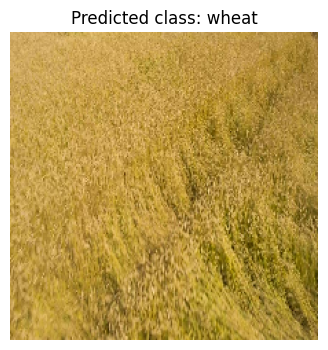

Predicted class: wheat (index: 4)

Do you want to upload more images? (type 'yes' to continue or any other key to exit): yes

Please upload an image to test:


Saving jute003.jpg to jute003 (1).jpg

Testing image: jute003 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step


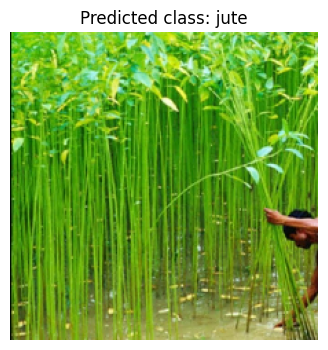

Predicted class: jute (index: 0)

Do you want to upload more images? (type 'yes' to continue or any other key to exit): yes

Please upload an image to test:


Saving rice-field02.jpg to rice-field02.jpg

Testing image: rice-field02.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


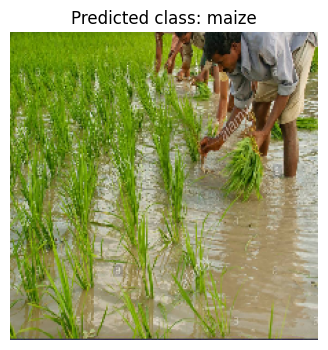

Predicted class: maize (index: 1)

Do you want to upload more images? (type 'yes' to continue or any other key to exit): yes

Please upload an image to test:


Saving wheat.jpg to wheat.jpg

Testing image: wheat.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


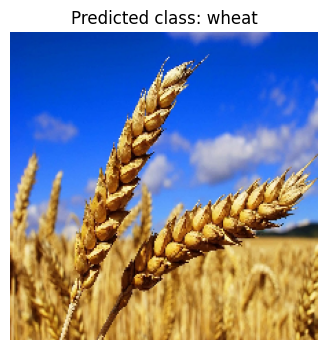

Predicted class: wheat (index: 4)

Do you want to upload more images? (type 'yes' to continue or any other key to exit): yes

Please upload an image to test:


Saving sugarcane fields.jpg to sugarcane fields (1).jpg

Testing image: sugarcane fields (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


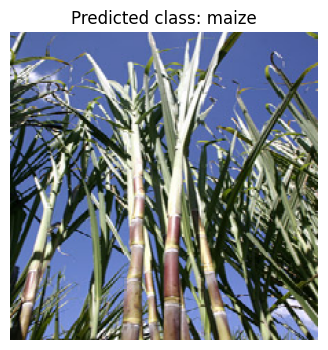

Predicted class: maize (index: 1)

Do you want to upload more images? (type 'yes' to continue or any other key to exit): yes

Please upload an image to test:


Saving sugarcane0004ahf.jpeg to sugarcane0004ahf.jpeg

Testing image: sugarcane0004ahf.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


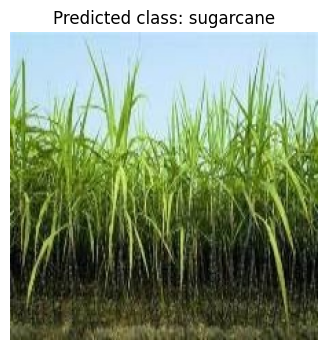

Predicted class: sugarcane (index: 3)

Do you want to upload more images? (type 'yes' to continue or any other key to exit): no
Thank you for using the Crop Prediction Tool. Goodbye!


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('crop_prediction_VGG16#3.h5')

# Define class names based on your training data's order
class_names = ['jute', 'maize', 'rice', 'sugarcane', 'wheat']  # Replace with your actual class names

def predict_image(image_path):
    """Load and preprocess the image, make a prediction, and display the image and result."""
    # Load and preprocess the image
    image = load_img(image_path, target_size=(224, 224))  # Ensure target_size matches your model's input size
    image_array = img_to_array(image)  # Convert to numpy array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = image_array / 255.0  # Normalize if required by your model

    # Make a prediction
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]

    # Display the image and prediction
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted class: {predicted_class_name}")
    plt.show()

    # Output the prediction details
    print(f"Predicted class: {predicted_class_name} (index: {predicted_class_index})")

def main():
    print("Welcome to the Crop Prediction Tool!")
    print("You can upload multiple images to test their predictions.")

    while True:
        # Upload images
        print("\nPlease upload an image to test:")
        uploaded = files.upload()

        # Process each uploaded image
        for filename in uploaded.keys():
            print(f"\nTesting image: {filename}")
            predict_image(filename)

        # Ask if the user wants to upload more images
        more_images = input("\nDo you want to upload more images? (type 'yes' to continue or any other key to exit): ")
        if more_images.lower() != 'yes':
            print("Thank you for using the Crop Prediction Tool. Goodbye!")
            break

# Run the main function
main()
